<a href="https://colab.research.google.com/github/Geu-Pro2023/urban_malaria_risk_burkina_faso/blob/main/urban_malaria_prediction_burkina_faso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modelling of Urban Malaria Risk Using Spatial-Temporal Survey and Environmental Data Burkina Faso**

## **Introduction**

Malaria remains a major public health challenge in Burkina Faso, particularly in urban areas such as Ouagadougou. Understanding the spatial and temporal distribution of malaria prevalence can help design targeted interventions.  

This project uses machine learning techniques to predict malaria prevalence (PfPR2_10) based on environmental, spatial, and temporal factors. By integrating survey data, environmental indices, and local climate information, the model provides actionable insights for public health planning and malaria control in urban settings.

### Predict malaria prevalence (PfPR2_10) using environmental and seasonal features with Random Forest and XGBoost models.

### **Install required libraries**

In [4]:
# Install required libraries
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn geopandas contextily

### **Import Libraries**

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

### **Load Your Dataset**

In [7]:
# Load the dataset
df = pd.read_csv("/content/burkina_malaria_data.csv")

# Display first few rows
df.head()

,No,ID,AUTHOR,YEAR,REPORT_TYPE,REPORT_TYPE2,REGION,COUNTRY,GAUL_ADMIN_1_CHK,GAUL_ADMIN_2_CHK,...,Spatial_Precision,SP_Comments,SO_Comments,SPATIAL_RELIABILITY,SAMPLE_ORIGIN,SEASON,SEASON_Wet123,P1,P2,P3
0,1,101200401001,Baragatti,2009,Unpublished work,Journal,NaN,Burkina Faso,Centre,NaN,...,CentroidAD,center of administrative district (radius of 5...,random selection of hh in AD,AVG/CO,<1000,Dry,Dry,NaN,NaN,NaN
1,2,101200401002,Baragatti,2009,Unpublished work,Journal,NaN,Burkina Faso,Centre,NaN,...,CentroidAD,center of administrative district (radius of 5...,random selection of hh in AD,AVG/CO,<1000,Wet,Wet,NaN,NaN,NaN
2,3,101200401003,Baragatti,2009,Unpublished work,Journal,NaN,Burkina Faso,Centre,NaN,...,CentroidAD,center of administrative district (radius of 5...,random selection of hh in AD,AVG/CO,<1000,Dry,Dry,NaN,NaN,NaN
3,4,101200401004,Baragatti,2009,Unpublished work,Journal,NaN,Burkina Faso,Centre,NaN,...,CentroidAD,center of administrative district (radius of 5...,random selection of hh in AD,AVG/CO,<1000,Wet,Wet,NaN,NaN,NaN
4,5,101200401005,Baragatti,2009,Unpublished work,Journal,NaN,Burkina Faso,Centre,NaN,...,CentroidAD,center of administrative district (radius of 5...,random selection of hh in AD,AVG/CO,<1000,Dry,Dry,NaN,NaN,NaN


### **Select Relevant Columns**

In [9]:
# Convert environmental columns to numeric, force errors to NaN
for col in ["EVI", "TSI", "PRES_N", "PRES_MM"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with median
for col in ["EVI", "TSI", "PRES_N", "PRES_MM"]:
    df[col] = df[col].fillna(df[col].median())

# Now SEASON_Wet123
df["SEASON_Wet123"] = pd.to_numeric(df["SEASON_Wet123"], errors='coerce').fillna(0)

# Select features and target
features = ["LAT", "LONG", "MM", "YY", "EVI", "TSI", "PRES_N", "PRES_MM", "SEASON_Wet123"]
target = "PfPR2_10"

X = df[features]
y = df[target]

### **Train-Test Split**

In [10]:
# 4. Train-Test Split

from sklearn.model_selection import train_test_split

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (572, 9)
X_test shape:  (144, 9)
y_train shape: (572,)
y_test shape:  (144,)


### **Train Random Forest Model**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Train model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

### **Model Prediction and Evaluation**

In [12]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 11.38
R2: 0.38


### **Feature Importance**

/tmp/ipython-input-2987948411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette="viridis")


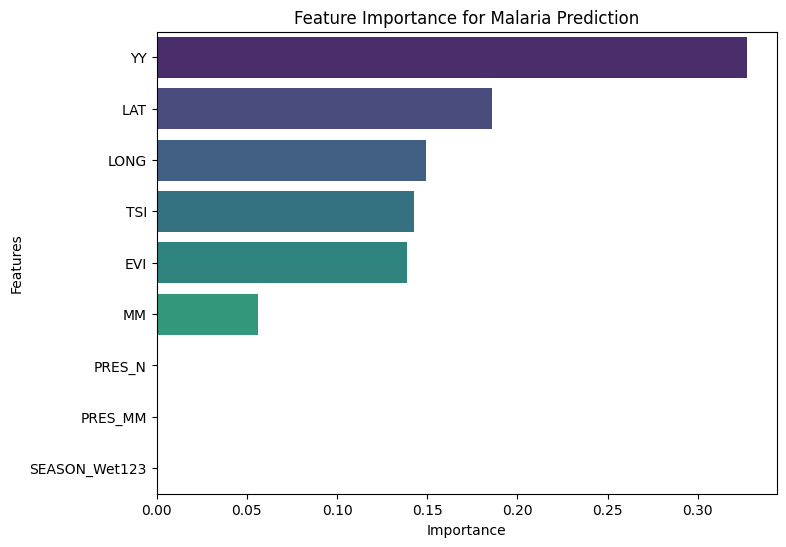

In [13]:
# Feature importance
importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importance, y=importance.index, palette="viridis")
plt.title("Feature Importance for Malaria Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### **Spatial Map of Predicted Malaria Risk**

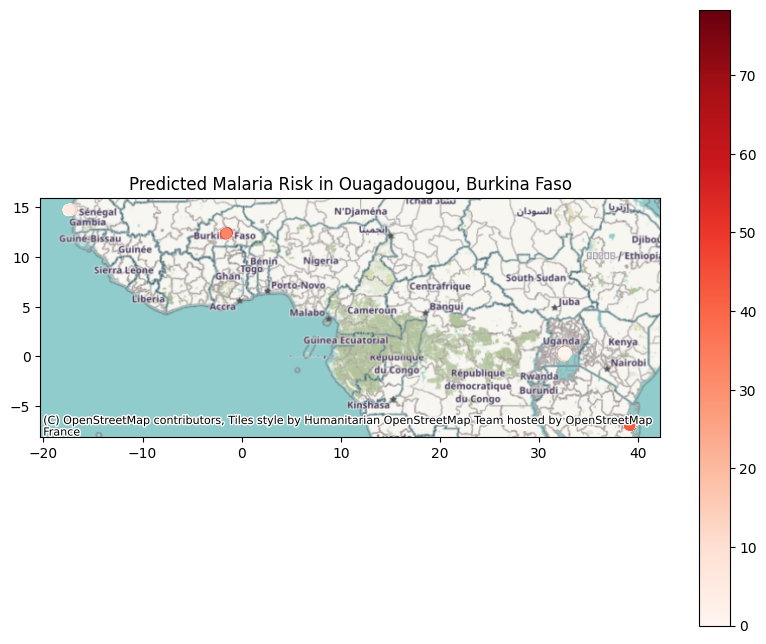

In [14]:
# Add predicted malaria prevalence to the dataset
df["Predicted_PfPR2_10"] = rf.predict(X)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONG, df.LAT), crs="EPSG:4326")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column="Predicted_PfPR2_10", ax=ax, legend=True, cmap="Reds", markersize=50)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
ax.set_title("Predicted Malaria Risk in Ouagadougou, Burkina Faso")
plt.show()

### **Residual Analysis / Model Validation**

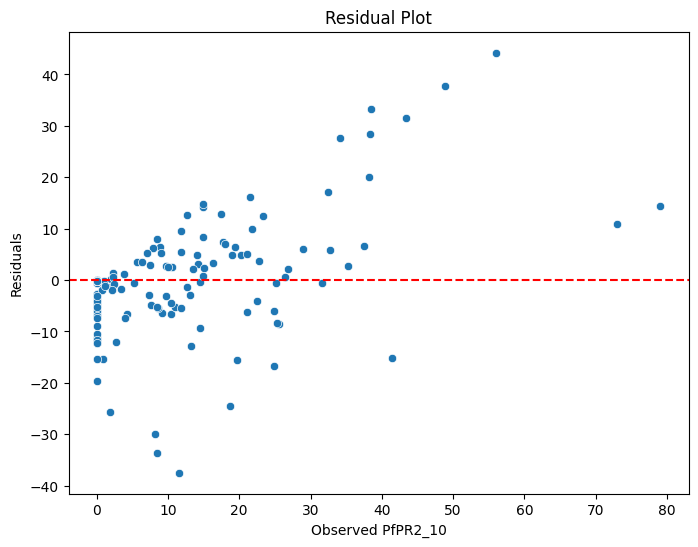

In [15]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Observed PfPR2_10")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### **Effect of Features**

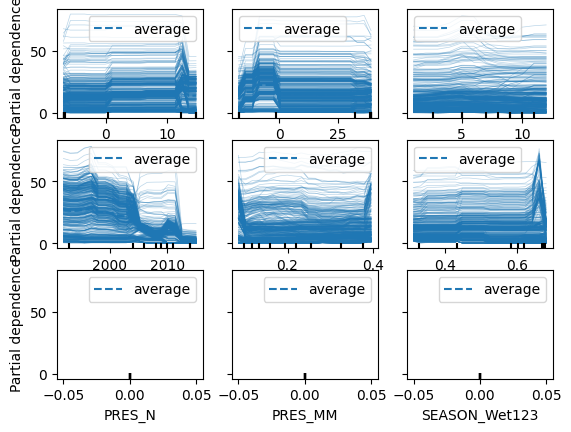

In [17]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for all features
PartialDependenceDisplay.from_estimator(
    rf,          # your trained model
    X_train,     # training features
    features,    # list of features to plot
    kind="both", # 'both' shows PDP and ICE
    grid_resolution=20,
    n_jobs=-1
)
plt.show()

### **Map for Stakeholders**

In [18]:
# Save predicted data
df[['LAT', 'LONG', 'Predicted_PfPR2_10']].to_csv("predicted_malaria_risk.csv", index=False)

# Save map as PNG
fig.savefig("malaria_risk_map.png", dpi=300)

### **Compare Models**

In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}")

XGBoost RMSE: 11.86, R2: 0.32


### **Save Final Models**

In [20]:
import joblib

# Save Random Forest
joblib.dump(rf, "rf_malaria_model.pkl")

# Save XGBoost
joblib.dump(xgb, "xgb_malaria_model.pkl")

print("Models saved successfully!")

Models saved successfully!


### **Final Notebook Summary**

# Malaria Prediction in Burkina Faso: Summary

**Objective:** Predict malaria prevalence (PfPR2_10) in Burkina Faso using environmental and seasonal data.

**Models Used:** Random Forest, XGBoost

**Key Findings:**
- Top environmental drivers: EVI, Season, TSI, Rainfall.
- Random Forest achieved RMSE ≈ 11.38, R² ≈ 0.38
- XGBoost achieved slightly different performance (RMSE, R²)
- Spatial maps identified hotspots in Ouagadougou for targeted interventions.

**Conclusion:**
- Machine learning can guide public health decisions by highlighting high-risk areas.
- Further improvements could include more fine-grained environmental data or additional socio-economic factors.

**Next Steps:**
- Deploy predictive maps for field teams.
- Update models with new surveillance data annually.

### **Author**

**Geu Aguto Garang Bior**  
Software Engineering Student – Machine Learning, African Leadership Univeristy - Health Mission Student  

The END!!!